In [1]:
pip install pandas matplotlib



     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------------------------------  163.8/165.9 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/7.8 MB 12.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 17.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 20.0 MB/s eta 0:00:01
   ------------------- -------------------- 3.7/7.8 MB 18.3 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.8 MB 17.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.8 MB 17.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.8 MB 17.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.8 MB 17.4 MB/s eta 0:00:01
   ----------------------------- ---------- 5.7/7.8 MB 12.1 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('C:/Users/growdev/Desktop/Analise_Preditiva/datasource/datasource_industry.csv')

# Verificar os nomes das colunas para garantir que estamos usando o nome correto
print("Colunas disponíveis:", df.columns)

# Verificar as primeiras linhas do DataFrame
print(df.head())

# Remover espaços extras dos nomes das colunas, se necessário
df.columns = df.columns.str.strip()



Colunas disponíveis: Index(['temperature', 'date', 'dia_da_semana', 'mes_venda',
       'temperatura_celsius', 'total_de_vendas'],
      dtype='object')
  temperature                           date dia_da_semana mes_venda  \
0         65F  segunda-feira, março 01, 2004           seg       mar   
1         63F    terça-feira, março 02, 2004           ter       mar   
2         62F   quarta-feira, março 03, 2004           qua       mar   
3         65F   quinta-feira, março 04, 2004           qui       mar   
4         63F    sexta-feira, março 05, 2004           sex       mar   

   temperatura_celsius  total_de_vendas  
0                 24.0          38911.0  
1                 23.0          36337.0  
2                 22.0          35728.0  
3                 24.0          36945.0  
4                 23.0          36335.0  


Análise mensal

Colunas disponíveis: Index(['temperature', 'date', 'dia_da_semana', 'mes_venda',
       'temperatura_celsius', 'total_de_vendas', 'semana_do_mes', 'mes'],
      dtype='object')
temperature                    object
date                   datetime64[ns]
dia_da_semana                  object
mes_venda                      object
temperatura_celsius           float64
total_de_vendas               float64
semana_do_mes                 float64
mes                           float64
dtype: object
Valores nulos em 'total_de_vendas': 0


C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\3556027571.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_de_vendas'].fillna(0, inplace=True)


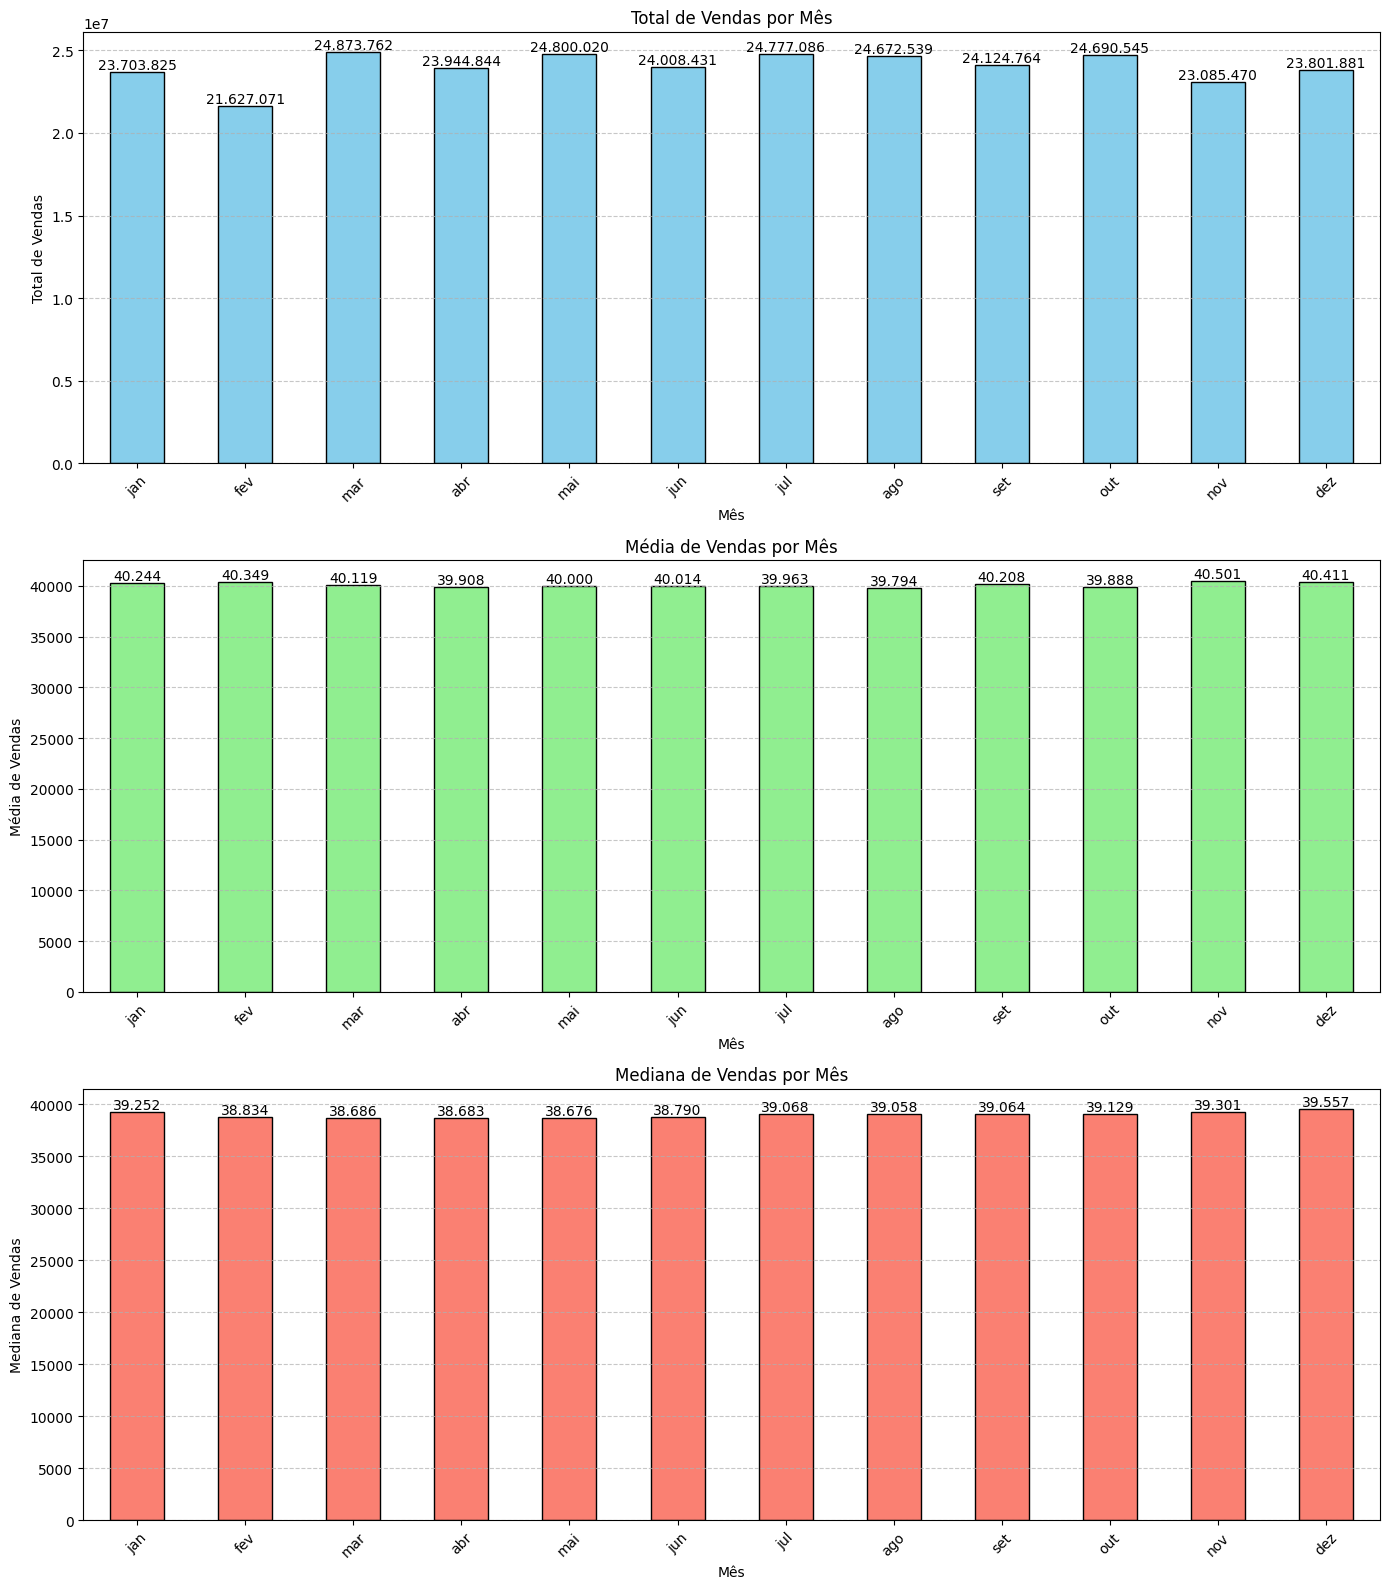

In [85]:
# Verificar os nomes das colunas e os tipos de dados
print("Colunas disponíveis:", df.columns)
print(df.dtypes)

# Converter a coluna 'total_de_vendas' para numérico, forçando erros a NaN
df['total_de_vendas'] = pd.to_numeric(df['total_de_vendas'], errors='coerce')

# Verificar valores nulos após a conversão
print("Valores nulos em 'total_de_vendas':", df['total_de_vendas'].isnull().sum())

# Preencher valores nulos com 0
df['total_de_vendas'].fillna(0, inplace=True)

# Agrupar os dados por 'mes_venda' e calcular o total, média e mediana de vendas por mês
vendas_por_mes = df.groupby('mes_venda')['total_de_vendas'].agg(['sum', 'mean', 'median'])

# Ordenar os meses de acordo com a ordem do ano
ordem_meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
vendas_por_mes = vendas_por_mes.reindex(ordem_meses)

# Plotar o gráfico do total de vendas por mês
plt.figure(figsize=(14, 8))

# Gráfico Total de Vendas
plt.subplot(3, 1, 1)
vendas_por_mes['sum'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}'.replace(',', '.'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points',
                       fontsize=10, color='black')

# Gráfico Média de Vendas
plt.subplot(3, 1, 2)
vendas_por_mes['mean'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Média de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}'.replace(',', '.'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points',
                       fontsize=10, color='black')
    
# Gráfico Mediana de Vendas
plt.subplot(3, 1, 3)
vendas_por_mes['median'].plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Mediana de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Mediana de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}'.replace(',', '.'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points',
                       fontsize=10, color='black')

plt.tight_layout()  # Ajustar o layout para evitar sobreposições

# Ajustar o layout para evitar sobreposições e aumentar margens
plt.tight_layout(rect=[0, 0, 1, 2])  # Ajusta a área de plotagem

# Mostrar os gráficos
plt.show()


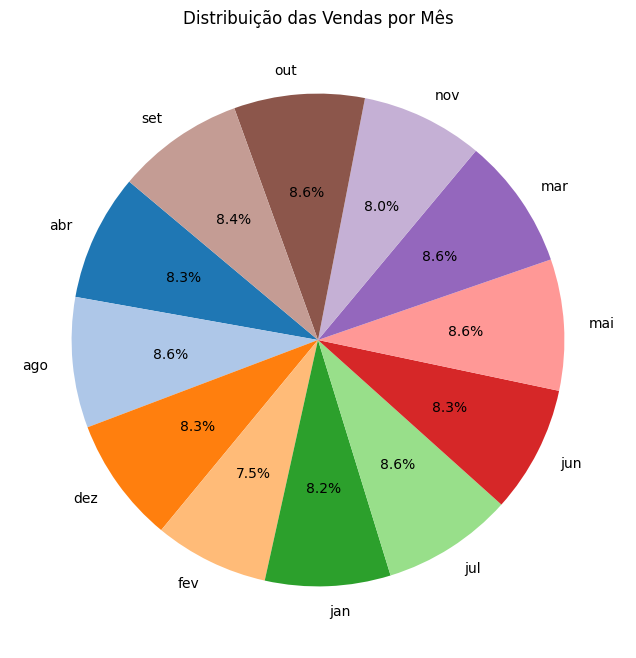

In [61]:
# Agrupar os dados por 'mes_venda' e calcular o total de vendas por mês
vendas_por_mes = df.groupby('mes_venda')['total_de_vendas'].sum()

# Plotar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(vendas_por_mes, labels=vendas_por_mes.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribuição das Vendas por Mês')

# Mostrar o gráfico
plt.show()


C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\2740218315.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (vendas_por_mes.index[i], vendas_por_mes['sum'][i]),
C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\2740218315.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (vendas_por_mes.index[i], vendas_por_mes['mean'][i]),
C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\2740218315.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

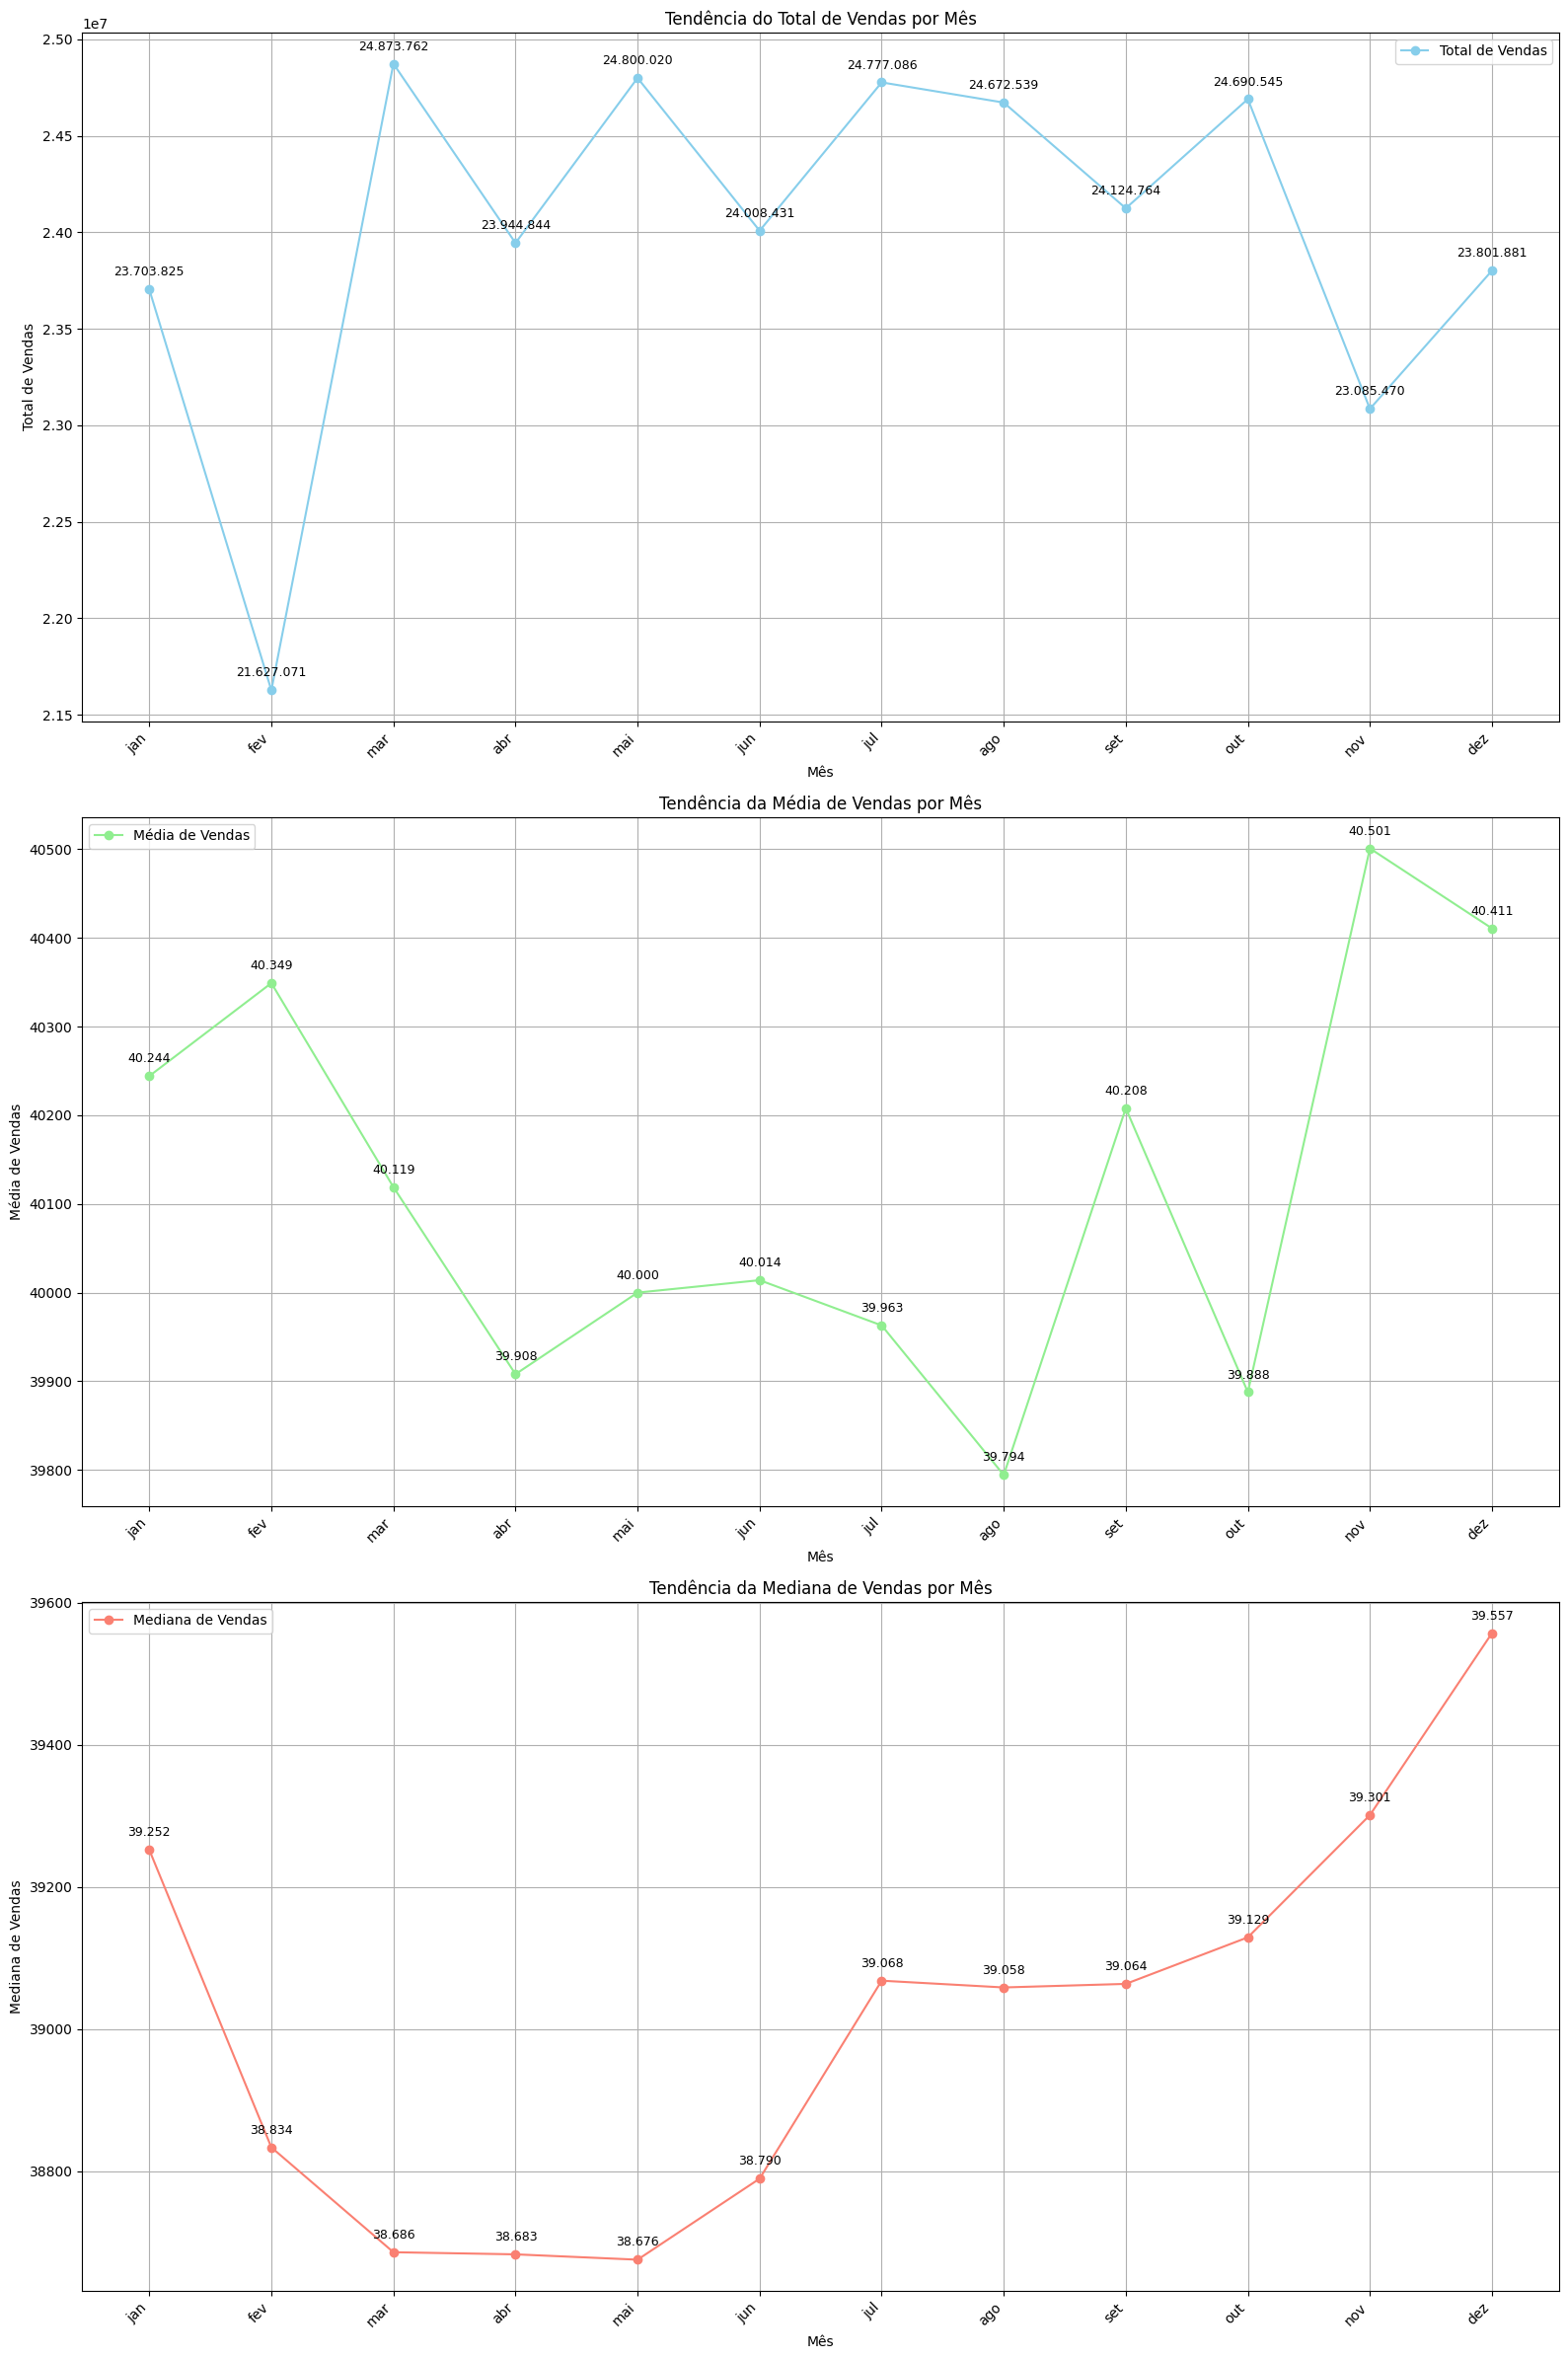

In [86]:
# Configurar o tamanho da figura
plt.figure(figsize=(16, 12))

# Gráfico de Linha para Total de Vendas
plt.subplot(3, 1, 1)
plt.plot(vendas_por_mes.index, vendas_por_mes['sum'], marker='o', linestyle='-', color='skyblue', label='Total de Vendas')
plt.title('Tendência do Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

# Adicionar valores aos pontos do gráfico
for i, value in enumerate(vendas_por_mes['sum']):
    plt.annotate(f'{value:,.0f}'.replace(',', '.'), 
                 (vendas_por_mes.index[i], vendas_por_mes['sum'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=9, color='black')

# Gráfico de Linha para Média de Vendas
plt.subplot(3, 1, 2)
plt.plot(vendas_por_mes.index, vendas_por_mes['mean'], marker='o', linestyle='-', color='lightgreen', label='Média de Vendas')
plt.title('Tendência da Média de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

# Adicionar valores aos pontos do gráfico
for i, value in enumerate(vendas_por_mes['mean']):
    plt.annotate(f'{value:,.0f}'.replace(',', '.'), 
                 (vendas_por_mes.index[i], vendas_por_mes['mean'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=9, color='black')

# Gráfico de Linha para Mediana de Vendas
plt.subplot(3, 1, 3)
plt.plot(vendas_por_mes.index, vendas_por_mes['median'], marker='o', linestyle='-', color='salmon', label='Mediana de Vendas')
plt.title('Tendência da Mediana de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Mediana de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

# Adicionar valores aos pontos do gráfico
for i, value in enumerate(vendas_por_mes['median']):
    plt.annotate(f'{value:,.0f}'.replace(',', '.'), 
                 (vendas_por_mes.index[i], vendas_por_mes['median'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=9, color='black')

# Ajustar o layout para evitar sobreposições
plt.tight_layout(rect=[0, 0, 1, 2])

# Mostrar os gráficos
plt.show()


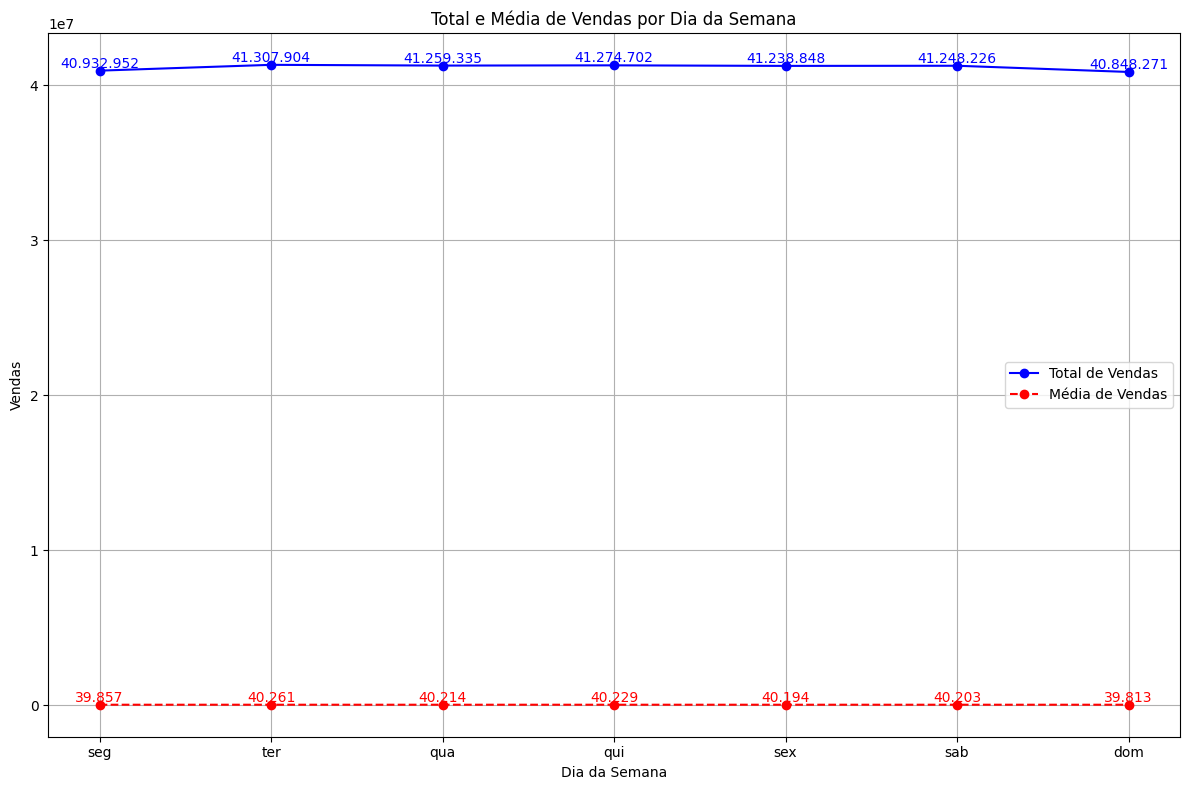

In [68]:
# Agrupar os dados por 'dia_da_semana' e calcular o total e a média de vendas
vendas_por_dia = df.groupby('dia_da_semana')['total_de_vendas'].agg(['sum', 'mean'])

# Ordenar os dias da semana na ordem correta
dias_da_semana = ['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom']
vendas_por_dia = vendas_por_dia.reindex(dias_da_semana)

# Plotar o gráfico
plt.figure(figsize=(12, 8))

# Plotar a soma das vendas
plt.plot(vendas_por_dia.index, vendas_por_dia['sum'], marker='o', linestyle='-', color='b', label='Total de Vendas')

# Plotar a média das vendas
plt.plot(vendas_por_dia.index, vendas_por_dia['mean'], marker='o', linestyle='--', color='r', label='Média de Vendas')

# Adicionar título e rótulos aos eixos
plt.title('Total e Média de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas')

# Adicionar uma legenda
plt.legend()

# Adicionar valores aos pontos com formatação personalizada
for i in range(len(vendas_por_dia.index)):
    plt.text(vendas_por_dia.index[i], vendas_por_dia['sum'].iloc[i], 
             f'{vendas_por_dia["sum"].iloc[i]:,.0f}'.replace(',', '.'), 
             ha='center', va='bottom', color='b')
    plt.text(vendas_por_dia.index[i], vendas_por_dia['mean'].iloc[i], 
             f'{vendas_por_dia["mean"].iloc[i]:,.0f}'.replace(',', '.'), 
             ha='center', va='bottom', color='r')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\3927179827.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temperatura_por_mes.index[i], temperatura_por_mes[i],
C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\3927179827.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{temperatura_por_mes[i]:.1f}'.replace(',', '.'),


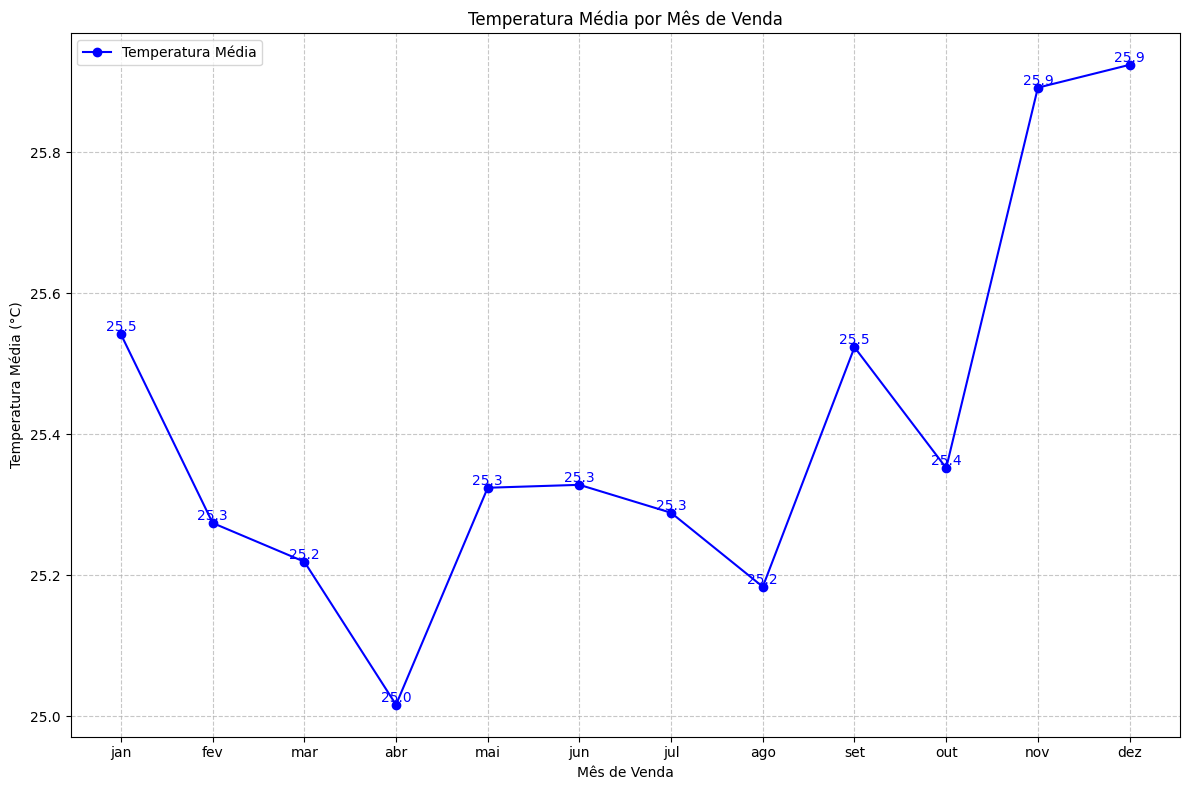

In [73]:
# Agrupar os dados por 'mes_venda' e calcular a média da temperatura
temperatura_por_mes = df.groupby('mes_venda')['temperatura_celsius'].mean()

# Ordenar os meses de acordo com a ordem do ano
ordenar_meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
temperatura_por_mes = temperatura_por_mes.reindex(ordenar_meses)

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(temperatura_por_mes.index, temperatura_por_mes, marker='o', linestyle='-', color='b', label='Temperatura Média')

# Adicionar título e rótulos aos eixos
plt.title('Temperatura Média por Mês de Venda')
plt.xlabel('Mês de Venda')
plt.ylabel('Temperatura Média (°C)')

# Adicionar valores aos pontos
for i in range(len(temperatura_por_mes.index)):
    plt.text(temperatura_por_mes.index[i], temperatura_por_mes[i], 
             f'{temperatura_por_mes[i]:.1f}'.replace(',', '.'), 
             ha='center', va='bottom', color='b')

# Adicionar uma legenda
plt.legend()

# Ajustar o layout para evitar sobreposições
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()


C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\1164219700.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temperatura_celsius'].fillna(0, inplace=True)
C:\Users\growdev\AppData\Local\Temp\ipykernel_9988\1164219700.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temperatura_por_dia.index[i], temperatura_por_dia[i],
C

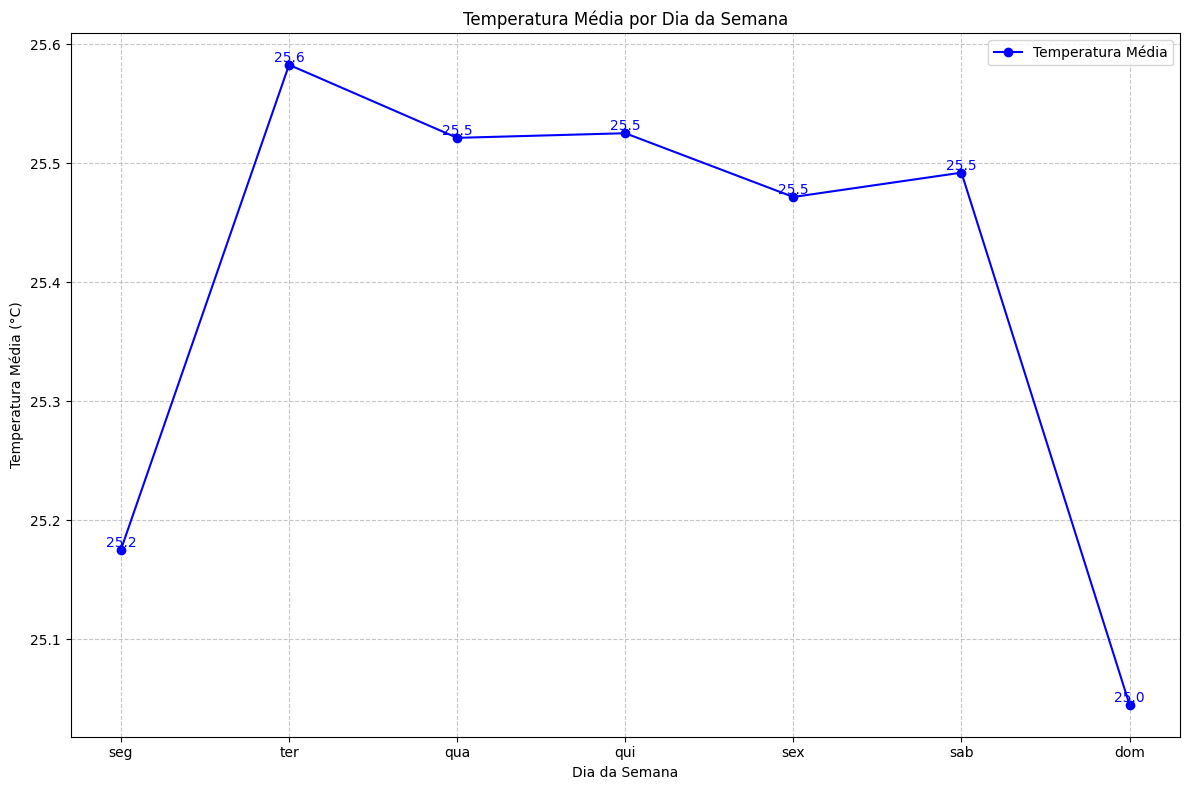

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
#df = pd.read_csv('datasource.csv')

# Remover espaços extras dos nomes das colunas, se necessário
df.columns = df.columns.str.strip()

# Converter a coluna 'temperatura_celsius' para numérico, forçando erros a NaN
df['temperatura_celsius'] = pd.to_numeric(df['temperatura_celsius'], errors='coerce')

# Verificar e preencher valores nulos
df['temperatura_celsius'].fillna(0, inplace=True)

# Agrupar os dados por 'dia_da_semana' e calcular a média da temperatura
temperatura_por_dia = df.groupby('dia_da_semana')['temperatura_celsius'].mean()

# Ordenar os dias da semana na ordem correta
dias_da_semana = ['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom']
temperatura_por_dia = temperatura_por_dia.reindex(dias_da_semana)

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.plot(temperatura_por_dia.index, temperatura_por_dia, marker='o', linestyle='-', color='b', label='Temperatura Média')

# Adicionar título e rótulos aos eixos
plt.title('Temperatura Média por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Temperatura Média (°C)')

# Adicionar valores aos pontos
for i in range(len(temperatura_por_dia.index)):
    plt.text(temperatura_por_dia.index[i], temperatura_por_dia[i], 
             f'{temperatura_por_dia[i]:.1f}'.replace(',', '.'), 
             ha='center', va='bottom', color='b')

# Adicionar uma legenda
plt.legend()

# Ajustar o layout para evitar sobreposições
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()


In [77]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------- ----- 256.0/294.9 kB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


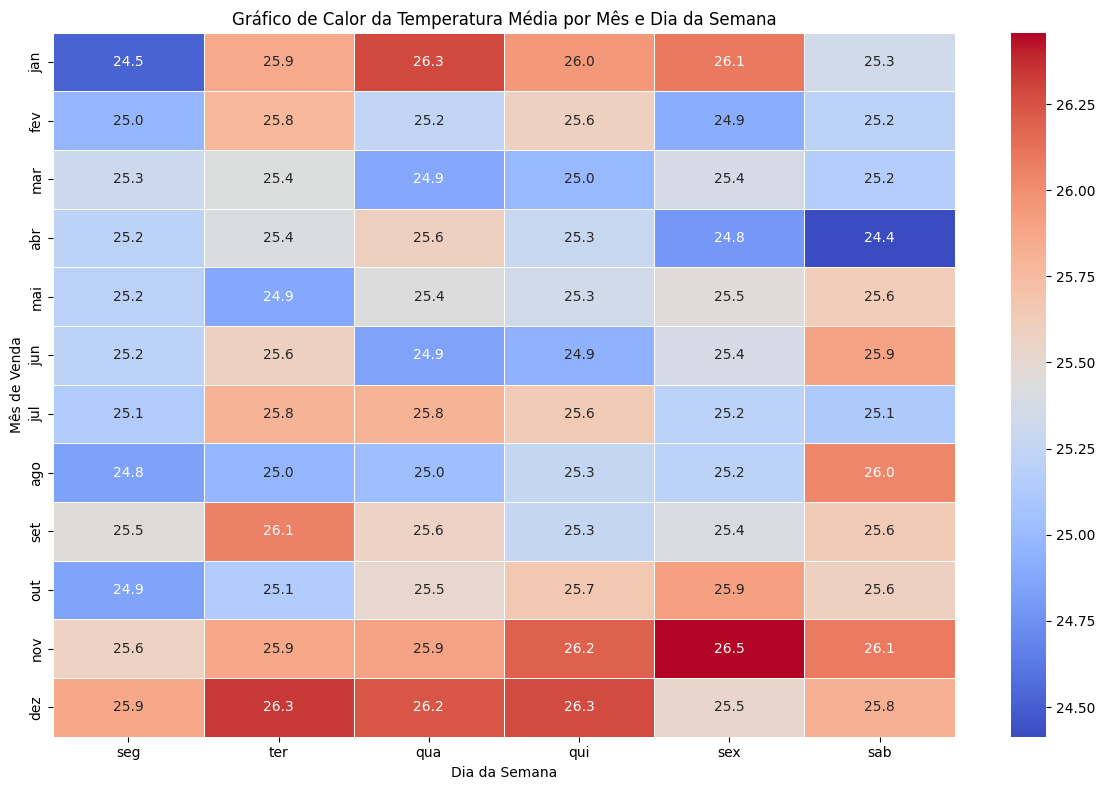

In [88]:
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

# Carregar o arquivo CSV
#df = pd.read_csv('datasource.csv')

# Remover espaços extras dos nomes das colunas, se necessário
#df.columns = df.columns.str.strip()

# Converter a coluna 'temperatura_celsius' para numérico, forçando erros a NaN
#df['temperatura_celsius'] = pd.to_numeric(df['temperatura_celsius'], errors='coerce')

# Verificar e preencher valores nulos
#df['temperatura_celsius'].fillna(0, inplace=True)

# Agrupar os dados por 'mes_venda' e 'dia_da_semana' e calcular a média da temperatura
temperatura_por_mes_dia = df.groupby(['mes_venda', 'dia_da_semana'])['temperatura_celsius'].mean().unstack()

# Ordenar os meses e os dias da semana
ordenar_meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
ordenar_dias = ['seg', 'ter', 'qua', 'qui', 'sex', 'sab']
temperatura_por_mes_dia = temperatura_por_mes_dia.reindex(index=ordenar_meses, columns=ordenar_dias)

# Plotar o gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(temperatura_por_mes_dia, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5, vmin=temperatura_por_mes_dia.min().min(), vmax=temperatura_por_mes_dia.max().max())

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Calor da Temperatura Média por Mês e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Mês de Venda')

# Ajustar o layout para evitar sobreposições
plt.tight_layout()

# Mostrar o gráfico
plt.show()


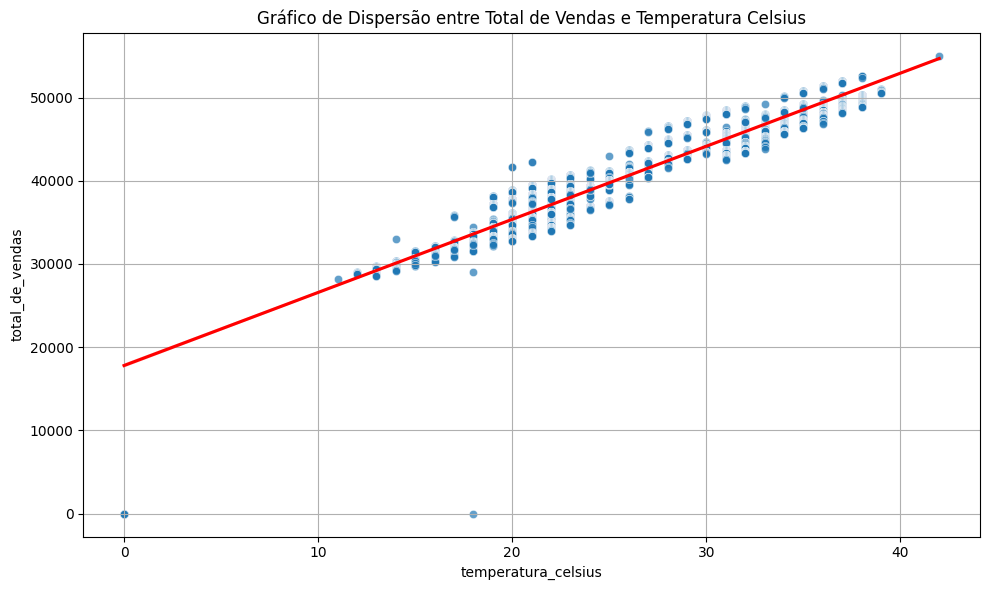

In [82]:
# Plotar o gráfico de dispersão usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperatura_celsius', y='total_de_vendas', data=df, alpha=0.7, edgecolor='w')
plt.title('Gráfico de Dispersão entre Total de Vendas e Temperatura Celsius')
plt.xlabel('Temperatura Celsius')
plt.ylabel('Total de Vendas')

# Adicionar uma linha de ajuste se desejado
sns.regplot(x='temperatura_celsius', y='total_de_vendas', data=df, scatter=False, color='r')

plt.grid(True)
plt.tight_layout()
plt.show()
